In [15]:
import pandas as pd

In [16]:
import cufflinks as cf
from plotly.offline import iplot
cf.go_offline()

In [17]:
from plotly import graph_objs as go
from plotly import tools as tls

In [45]:
symbol = 'spx'

In [46]:
posneg = pd.read_csv('data/pos_neg/posneg_stck_' + symbol + '_decl.csv', index_col=0)

In [47]:
price = pd.read_csv('data/prices/' + symbol + '_prices.csv', index_col=0, header=None)
price.columns = ['price']

In [48]:
si = ((posneg.pos - posneg.neg) / (posneg.pos + posneg.neg))
si = pd.DataFrame(si, columns=['si']).rolling(4).mean()

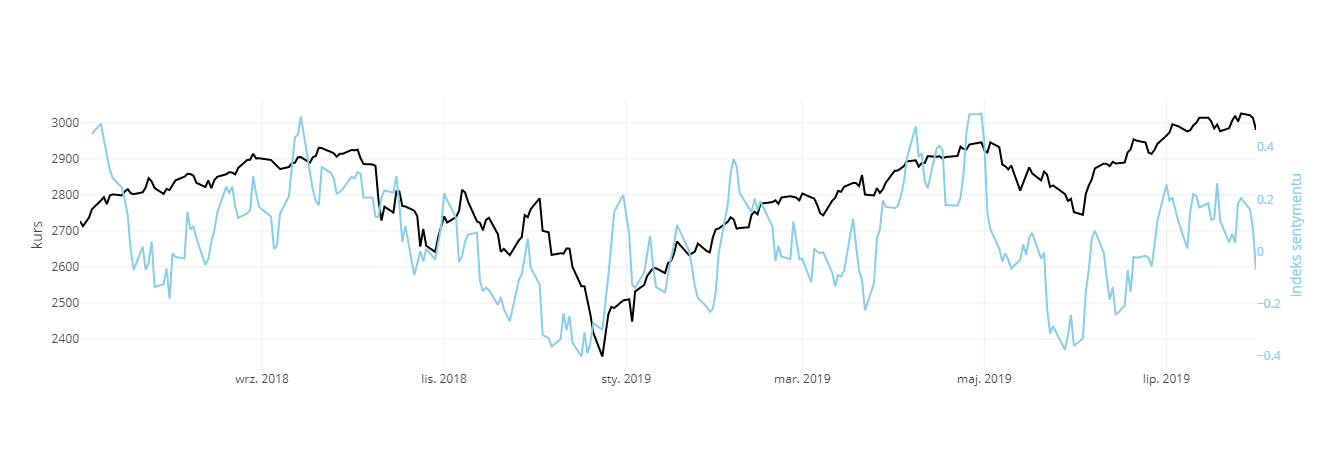

In [49]:
trace1 = go.Scatter(
    x=price.index,
    y=price.price,
    name='kurs',
    line = dict(color='rgb(0,0,0)')
)
trace2 = go.Scatter(
    x=si.index,
    y=si.si,
    name='indeks sentymentu',
    yaxis='y2',
    line = dict(color='rgb(135,206,235)')
)
data = [trace1, trace2]
layout = go.Layout(
    showlegend = False,
    yaxis=dict(
        title='kurs',
        showgrid=True
        
    ),
    yaxis2=dict(
        title='indeks sentymentu',
        titlefont=dict(
            color='rgb(135,206,235)'
        ),
        tickfont=dict(
            color='rgb(135,206,235)'
        ),
        overlaying='y',
        side='right',
        showgrid=False,
        zeroline=False
    ),
    
    xaxis = dict(
        
        tickvals = ['2018-09-01', '2018-11-01', '2019-01-01', '2019-03-01', '2019-05-01', '2019-07-01'],
        ticktext = ['wrz. 2018', 'lis. 2018', 'sty. 2019', 'mar. 2019', 'maj. 2019', 'lip. 2019']
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [50]:
from scipy.stats import pearsonr

In [51]:
pearsonr(price.values.ravel()[3:], si.values.ravel()[3:])

(0.4893617175138823, 1.3253252312437066e-17)

In [52]:
si.values[3:]

array([[ 4.51639784e-01],
       [ 4.91206179e-01],
       [ 4.29878618e-01],
       [ 3.76349206e-01],
       [ 3.12501777e-01],
       [ 2.80557332e-01],
       [ 2.45705711e-01],
       [ 1.97927933e-01],
       [ 1.37643418e-01],
       [ 2.06649480e-03],
       [-7.14512918e-02],
       [ 1.76472407e-02],
       [-7.05224021e-02],
       [-4.54252770e-02],
       [ 3.71504805e-02],
       [-1.37073500e-01],
       [-1.26359214e-01],
       [-6.60843343e-02],
       [-1.81825075e-01],
       [-7.60109453e-03],
       [-2.18868088e-02],
       [-2.74251340e-02],
       [ 1.52204496e-01],
       [ 8.47861799e-02],
       [ 9.62147513e-02],
       [ 5.05691057e-02],
       [-5.22982778e-02],
       [-2.85950830e-02],
       [ 3.62829657e-02],
       [ 7.95578195e-02],
       [ 1.48298219e-01],
       [ 2.48748141e-01],
       [ 2.23281857e-01],
       [ 2.49115672e-01],
       [ 1.74262443e-01],
       [ 1.28636794e-01],
       [ 1.45736657e-01],
       [ 1.57969707e-01],
       [ 2.8